# **Principal Component Analysis Dimensionality Reduction on Wine Dataset**

# **1. Importing and Analyzing The Dataset**

Here, we use sklearn to import the wine dataset to avoid hassle. The dataset is exactly the same as in https://archive.ics.uci.edu/ml/datasets/wine. So, let's import and analyze the dataset.


In [ ]:
import pandas as pd
import numpy as np

from sklearn.datasets import load_wine
X,y = load_wine(return_X_y=True)

#convert to dataframe to make it easier to analyze
X= pd.DataFrame(X,columns=["feature #" + str(i) for i in range(1, X.shape[1]+1 ) ])
y= pd.DataFrame(y,columns=["target"])

print( "target values: ", y.target.unique())
X.describe()


target values:  [0 1 2]


,feature #1,feature #2,feature #3,feature #4,feature #5,feature #6,feature #7,feature #8,feature #9,feature #10,feature #11,feature #12,feature #13
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


There are no null values in our dataset and all features are continuous.

Notice that the value of feature #13 is much bigger than the other feature. Thus, we need to normalize the dataset to prevent feature #13 dominating the other features.

There are 3 classes for the target value: 0, 1, and 2

# **2. Normalize The Dataset**

We use standardization (standard scaling) using sklearn library to normalize the dataset.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

#convert to pandas dataframe
X= pd.DataFrame(X,columns=["feature #" + str(i) for i in range(1, X.shape[1]+1 ) ])
X.describe()

,feature #1,feature #2,feature #3,feature #4,feature #5,feature #6,feature #7,feature #8,feature #9,feature #10,feature #11,feature #12,feature #13
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,7.841418e-15,2.444986e-16,-4.059175e-15,-7.110417e-17,-2.494883e-17,-1.955365e-16,9.443133e-16,-4.178929e-16,-1.540590e-15,-4.129032e-16,1.398382e-15,2.126888e-15,-6.985673e-17
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246e+00,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-8.854682e-01,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,9.595986e-02,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,8.089974e-01,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515e+00,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


Now no feature is dominating the other feature and so our dataset is ready.

# **3. Applying PCA**

We will try to implement PCA without using sklearn library. But, we will use numpy library to simplify the matrix operation.

## **a. Calculate Mean of Each Feature**

In [ ]:
means = np.mean(X, axis =0)

print(means)

feature #1     7.841418e-15
feature #2     2.444986e-16
feature #3    -4.059175e-15
feature #4    -7.110417e-17
feature #5    -2.494883e-17
feature #6    -1.955365e-16
feature #7     9.443133e-16
feature #8    -4.178929e-16
feature #9    -1.540590e-15
feature #10   -4.129032e-16
feature #11    1.398382e-15
feature #12    2.126888e-15
feature #13   -6.985673e-17
dtype: float64


## **b. Build Covariance Matrix For All Features**

Our goal here is to build a covariance matrix C. Because there are 13 features, the matrix size will be 13x13

$C=\begin{bmatrix}
cov(x_1,x_1) & \cdots  & cov(x_1,x_{13}) \\ 
\vdots  & \ddots  & \vdots \\ 
cov(x_{13},x_1) & \cdots  & cov(x_{13},x_{13})
\end{bmatrix}$.

In [ ]:
cov_matrix=np.cov(X.T) #don't forget to transpose the feature vector first

print(cov_matrix)


[[ 1.00564972  0.09493026  0.21273976 -0.31198788  0.27232816  0.29073446
   0.23815287 -0.15681042  0.13747022  0.549451   -0.07215255  0.07275191
   0.64735687]
 [ 0.09493026  1.00564972  0.16497228  0.29013035 -0.05488343 -0.3370606
  -0.41332866  0.29463237 -0.22199334  0.25039204 -0.56446685 -0.37079354
  -0.19309537]
 [ 0.21273976  0.16497228  1.00564972  0.44587209  0.28820583  0.12970824
   0.11572743  0.1872826   0.00970647  0.2603499  -0.07508874  0.00393333
   0.22488969]
 [-0.31198788  0.29013035  0.44587209  1.00564972 -0.0838039  -0.32292752
  -0.353355    0.36396647 -0.19844168  0.01883781 -0.27550299 -0.27833221
  -0.44308618]
 [ 0.27232816 -0.05488343  0.28820583 -0.0838039   1.00564972  0.21561254
   0.19688989 -0.25774204  0.23777643  0.20107967  0.05571118  0.06637684
   0.39557317]
 [ 0.29073446 -0.3370606   0.12970824 -0.32292752  0.21561254  1.00564972
   0.86944804 -0.45247731  0.61587304 -0.05544792  0.43613151  0.70390388
   0.50092909]
 [ 0.23815287 -0.413328

## **c. Calculate The Eigenvalues and Eigenvectors of The Covariance Matrix**

Because there are 13 features, there will be 13 eigenvalues and 13 eigenvectors corespondingly. After we have found the eigenvalues, and eigenvectors, sort the eigenvalues from highest to lowest and don't forget to also sort the corresponding eigenvectors.

note: read [this](https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors) if you don't understand what eigenvalue and eigenvector mean.

In [ ]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

print("unsorted eigenvalues:\n" ,eigenvalues)

i= np.argsort(eigenvalues)[::-1]
eigenvalues= eigenvalues[i]
print("sorted eigenvalues:\n",eigenvalues)


eigenvectors = eigenvectors[:,i]
print("Eigenvectors:\n", eigenvectors)



unsorted eigenvalues:
 [4.73243698 2.51108093 1.45424187 0.92416587 0.85804868 0.64528221
 0.55414147 0.10396199 0.35046627 0.16972374 0.29051203 0.22706428
 0.25232001]
sorted eigenvalues:
 [4.73243698 2.51108093 1.45424187 0.92416587 0.85804868 0.64528221
 0.55414147 0.35046627 0.29051203 0.25232001 0.22706428 0.16972374
 0.10396199]
Eigenvectors:
 [[-0.1443294   0.48365155 -0.20738262  0.0178563  -0.26566365  0.21353865
   0.05639636  0.39613926 -0.50861912  0.21160473 -0.22591696 -0.26628645
  -0.01496997]
 [ 0.24518758  0.22493093  0.08901289 -0.53689028  0.03521363  0.53681385
  -0.42052391  0.06582674  0.07528304 -0.30907994  0.07648554  0.12169604
  -0.02596375]
 [ 0.00205106  0.31606881  0.6262239   0.21417556 -0.14302547  0.15447466
   0.14917061 -0.17026002  0.30769445 -0.02712539 -0.49869142 -0.04962237
   0.14121803]
 [ 0.23932041 -0.0105905   0.61208035 -0.06085941  0.06610294 -0.10082451
   0.28696914  0.42797018 -0.20044931  0.05279942  0.47931378 -0.05574287
  -0.09168

## **d. Choosing The Eigenvalues and Eigenvectors**

Because we only want 2 principal components, we pick 2 eigenvector that have highest and second highest corresponding eigenvalues.

In [ ]:
selected_vectors= eigenvectors[:,:2]
print("the 2 selected eigenvectors:\n",selected_vectors)

the 2 selected eigenvectors:
 [[-0.1443294   0.48365155]
 [ 0.24518758  0.22493093]
 [ 0.00205106  0.31606881]
 [ 0.23932041 -0.0105905 ]
 [-0.14199204  0.299634  ]
 [-0.39466085  0.06503951]
 [-0.4229343  -0.00335981]
 [ 0.2985331   0.02877949]
 [-0.31342949  0.03930172]
 [ 0.0886167   0.52999567]
 [-0.29671456 -0.27923515]
 [-0.37616741 -0.16449619]
 [-0.28675223  0.36490283]]


## **e. Deriving New Dataset**

The new dataset, which we call as "principal component" or just "component" is derived from the dot product of the dataset and the seelcted eigenvectors

In [ ]:
pc_vectors = np.dot(X,selected_vectors)

print(pc_vectors)

[[-3.31675081  1.44346263]
 [-2.20946492 -0.33339289]
 [-2.51674015  1.0311513 ]
 [-3.75706561  2.75637191]
 [-1.00890849  0.86983082]
 [-3.05025392  2.12240111]
 [-2.44908967  1.17485013]
 [-2.05943687  1.60896307]
 [-2.5108743   0.91807096]
 [-2.75362819  0.78943767]
 [-3.47973668  1.30233324]
 [-1.7547529   0.61197723]
 [-2.11346234  0.67570634]
 [-3.45815682  1.13062988]
 [-4.31278391  2.09597558]
 [-2.3051882   1.66255173]
 [-2.17195527  2.32730534]
 [-1.89897118  1.63136888]
 [-3.54198508  2.51834367]
 [-2.0845222   1.06113799]
 [-3.12440254  0.78689711]
 [-1.08657007  0.24174355]
 [-2.53522408 -0.09184062]
 [-1.64498834 -0.51627893]
 [-1.76157587 -0.31714893]
 [-0.9900791   0.94066734]
 [-1.77527763  0.68617513]
 [-1.23542396 -0.08980704]
 [-2.18840633  0.68956962]
 [-2.25610898  0.19146194]
 [-2.50022003  1.24083383]
 [-2.67741105  1.47187365]
 [-1.62857912  0.05270445]
 [-1.90269086  1.63306043]
 [-1.41038853  0.69793432]
 [-1.90382623  0.17671095]
 [-1.38486223  0.65863985]
 

So, that's the principal components of our dataset (pc1 for the 1st column and pc2 for the 2nd column)

# **4. Plot The New Dataset**

since there are only 2 features now, we can easily visualize the dataset using a scatter graph.

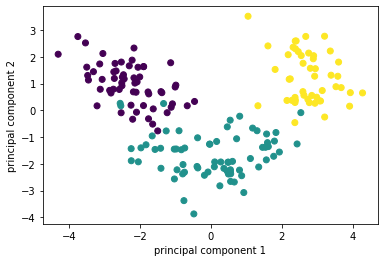

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(pc_vectors[:,0], pc_vectors[:,1], c= y.values)
plt.xlabel("principal component 1")
plt.ylabel("principal component 2");
plt.show()

We could say that our PCA is success since the graph above clearly show and seperate the dataset according to its class (represented by different colors)

# **5. Evaluation**

Lastly, we compare the result of using all features vs only 2 features (2 pc). We will use KNN classification to evaluate the result.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

n = 17

knn_nonpca = KNeighborsClassifier(n_neighbors=n)
knn_nonpca.fit(X, y) # using all features
print("accuracy using all features:\n",knn_nonpca.score(X,y),"\n\n")

knn_pca_manual = KNeighborsClassifier(n_neighbors=n)
knn_pca_manual.fit(pc_vectors[:,:2], y) # using only 2 features
print("accuracy using only 2 features:\n",knn_pca_manual.score(pc_vectors[:,:2],y),"\n\n")

accuracy using all features:
 0.9775280898876404 


accuracy using only 2 features:
 0.9719101123595506 




/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


Notice that the accuracy of using only 2 PCs is close to using all features. Keep in mind that the accuracy score was calculated based on the training dataset. In some cases, the model using principal component could have a higher or lower accuracy. 

**However, the main goal of PCA is to reduce the size of feature vectors for computational efficiency.** In this example we have shown that we can significantly reduce 13 features to only 2 features while maintaining the accuracy.